# Data Mining Assignment 2_NN

## Student Details

Student Name and ID of the member submitting the assignment: Dumpa Bharat Kumar , ID - 1001870815

Student Name and ID of the remaining members: Likhita Muddana, ID – 1001949141

Notes:
When submitting, fill your name and ID in this cell. Note that this is a markdown cell!<br>
Do not make any changes in the dataset file and do not rename the 'database.csv'.
<br> Rename your submission file to <b> 'yourLastName_Last4digitsofyourID_PA1.ipynb' </b>. 
<br> Do not to forget to cite any external sources used by you. 
**10 points per question will be deducted incase you fail to do so**
<br>**DO NOT DELETE THIS CELL**<br>
#### Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.

 * Load pima-indians-diabetes dataset from sklearn datasets. Output/prediction variable is 'class'[1 points]
 * while selecting best 3 attributes for training,validating and testing your model. [2 points]
 * Find the best K. [3 points]
 * Split your dataset - 60% for training set, 20% for Validation set and 20% for testing set the classifier. Use random state as 2022 [2 points]
 * Use minkowski distance.[1 points]
 * Test the classifier with three different numbers for neighbors and record the results for training, validation and testing. Show the best one.[3 points]
 * Use comments to explain your code and variable names.[4 points]
 * Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, and support) for all three different numbers.[6 points]
 * Plot the classifier in a 2D projection.[3 points]

## Report (23 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Explain all the preprocessing done in detail.[4 points]
* Explain all the parameters of KNN in details in your own words. Do not copy paste. Give references. 10 Points will be deducted if you copy paste from the internet. [5 points]
* Explain what was your criteria for selecting the three attributes. [5 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [4 points]
* Interprete and compare the results explain in details.[5 points]

Do not to forget to cite your sources!

In [332]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
# from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix,classification_report #To import confusion matrix and report 
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from numpy import loadtxt
from sklearn import preprocessing


In [333]:
#1. Load pima-indians-diabetes dataset from sklearn datasets. 
df_data = pd.read_csv('pima-indians-diabetes.csv', encoding='latin1')

In [334]:
#checking for the Zero values and interpolating it as step of data cleaning.
#doing the preprocessing
columns_with_zero_values=['Pres','mass','Plas','skin'] 
for column in columns_with_zero_values:
    df_data[column]=df_data[column].replace(0,np.NaN)
df_N_data = df_data.interpolate()

In [335]:
#Selecting the best 3 Attributes using selectKBest Algorithm.

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#it is the dataset with all the columns except the prediction variable.
featured_data = df_N_data.iloc[:,0:8] 

#it is the dataset of the prediction variable.
prediction_data = df_N_data['class']


BestFeatures = SelectKBest(score_func=chi2, k=3)

#taking the best fit on the basis of feature Data and Prediction Data
fit = BestFeatures.fit(featured_data,prediction_data)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(featured_data.columns)
f_Scores = pd.concat([df_columns,df_scores],axis=1) 

#creating the intermediate dataset with column names and score 
f_Scores.columns = ['columns','Score'] 
f_Scores 

#getting the top 3 columns where the score is highest.
print(f_Scores.nlargest(3,'Score'))

  columns        Score
4    test  2175.565273
1    Plas  1417.397908
7     age   181.303689


In [336]:
#Splitting dataset 60% for training, 20 for validation and 20% for testing the classifier. Use random state as 2022

#spliting the dataset into 60% training dataset.
feature_training,feature_test,prediction_train,prediction_test=train_test_split(featured_data,prediction_data,train_size=0.6,random_state = 2022) 
#spliting the dataset into 20% testing and 20% validation dataset.
feature_valid, feature_test, prediction_valid, prediction_test = train_test_split(feature_test,prediction_test, test_size=0.5, random_state = 2022)


In [337]:
#creating the dataset with the selected columns 
feature_training=feature_training[['test', 'Plas', 'age']]
feature_test=feature_test[['test', 'Plas', 'age']]
feature_valid=feature_valid[['test', 'Plas', 'age']]

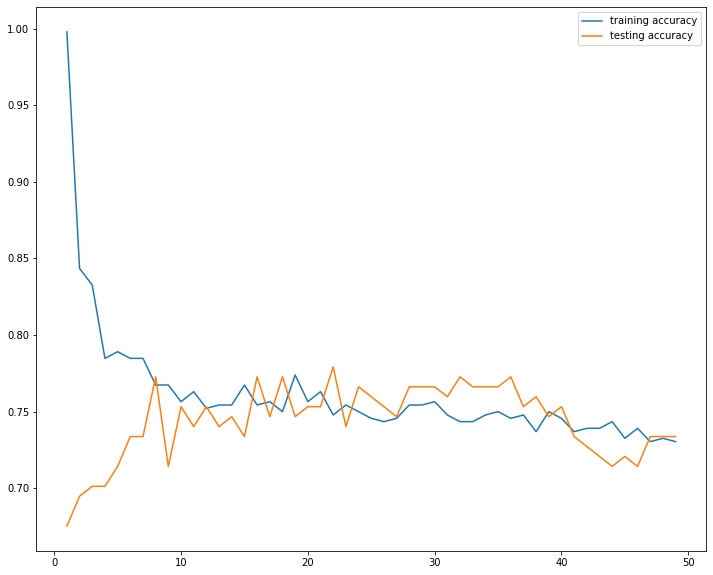

In [338]:
training_accuracy=[]
testing_accuracy=[]
#calculating the testing and training accuracy for the values of k to select the bestK value in range of 1 to 50.
kNeighbors=range(1,50)
for n in kNeighbors:
    classifier=KNeighborsClassifier(n_neighbors=n,p=2,metric='minkowski')#using the KNN Classifier with minkowski distance as metirc
    classifier.fit(feature_training,prediction_train)
    training_accuracy.append(classifier.score(feature_training,prediction_train))
    testing_accuracy.append(classifier.score(feature_test,prediction_test))
#plotting the training accuracy and testing accuracy

import matplotlib.pyplot as plt  
plt.figure(figsize=(12,10))
plt.plot(kNeighbors,training_accuracy,label='training accuracy')
plt.plot(kNeighbors,testing_accuracy,label='testing accuracy')

plt.legend(['training accuracy','testing accuracy'])

In [339]:
#method to calculate Accuracy, Confusion matrix and Classification Report.

def calculate(model):
    knn_model=model.fit(feature_training, prediction_train) #training the model using training set
    print('k-NN score for testing set: %f' % knn_model.score(feature_test, prediction_test))
    print('k-NN score for training set: %f' % knn_model.score(feature_training, prediction_train))
    print('k-NN score for validation set: %f' % knn_model.score(feature_valid, prediction_valid))
    predictions = model.predict(feature_test) 

    #Performance measurement
    #predicting the accuracy using test dataset
    print("Accuracy:",metrics.accuracy_score(prediction_test, predictions)) 
    cm = confusion_matrix(prediction_test, predictions)

    #Printing confusion matrix
    print("\nConfusion Matrix:\n",cm) 
    #Printing classification report 
    print("\nClassification Report:\n",classification_report(prediction_test, predictions)) 

    import seaborn as sns 
    ax= plt.subplot()
    #using the sns seaborn to get the heatmap to plot confusion matrix
    sns.heatmap(cm, annot=True, fmt='g', ax=ax);  

    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Positive', 'Negetive']); ax.yaxis.set_ticklabels(['Positive', 'Negetive'])




k-NN score for testing set: 0.766234
k-NN score for training set: 0.750000
k-NN score for validation set: 0.720779
Accuracy: 0.7662337662337663

Confusion Matrix:
 [[94 12]
 [24 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.67      0.50      0.57        48

    accuracy                           0.77       154
   macro avg       0.73      0.69      0.71       154
weighted avg       0.76      0.77      0.76       154



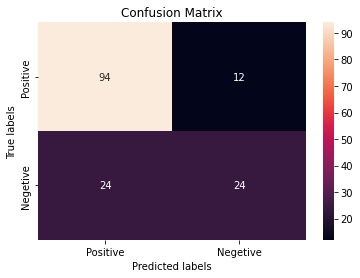

In [340]:
#The best value of K=24 from above plot so calculated its Accuracy,confusion matrix and Classification repo
model = KNeighborsClassifier(n_neighbors = 24,metric='minkowski') 

calculate(model)

k-NN score for testing set: 0.746753
k-NN score for training set: 0.745652
k-NN score for validation set: 0.701299
Accuracy: 0.7467532467532467

Confusion Matrix:
 [[90 16]
 [23 25]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.82       106
           1       0.61      0.52      0.56        48

    accuracy                           0.75       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



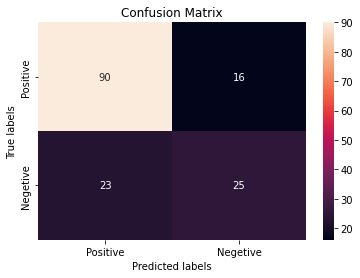

In [341]:
#Training and making the predictions for the vale of K = 27
model = KNeighborsClassifier(n_neighbors = 27,metric='minkowski') 

calculate(model)

k-NN score for testing set: 0.759740
k-NN score for training set: 0.736957
k-NN score for validation set: 0.753247
Accuracy: 0.7597402597402597

Confusion Matrix:
 [[93 13]
 [24 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       106
           1       0.65      0.50      0.56        48

    accuracy                           0.76       154
   macro avg       0.72      0.69      0.70       154
weighted avg       0.75      0.76      0.75       154



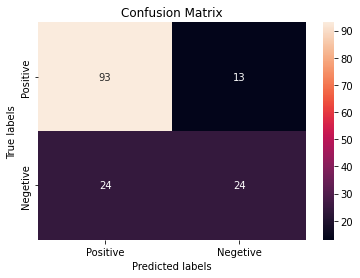

In [342]:
#Training and making the predictions for the vale of K = 38
model = KNeighborsClassifier(n_neighbors = 38,metric='minkowski')

calculate(model)

k-NN score for testing set: 0.753247
k-NN score for training set: 0.756522
k-NN score for validation set: 0.733766
Accuracy: 0.7532467532467533

Confusion Matrix:
 [[92 14]
 [24 24]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.87      0.83       106
           1       0.63      0.50      0.56        48

    accuracy                           0.75       154
   macro avg       0.71      0.68      0.69       154
weighted avg       0.74      0.75      0.74       154



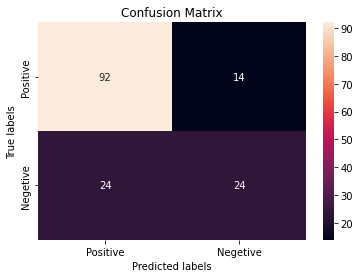

In [343]:
#TTraining and making the predictions for the vale of K = 20
model = KNeighborsClassifier(n_neighbors = 20,metric='minkowski') 

calculate(model)